<a href="https://colab.research.google.com/github/ashraful005/DS_ML_Bootcamp/blob/master/novel98.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [164]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [165]:
%%capture
!pip install torchmetrics
!pip install torchinfo

In [166]:
# Data handling
import pandas as pd
import numpy as np

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image

# Preprocessing
import cv2
from sklearn.model_selection import train_test_split as tts

# Torch
import torch
from torch import nn, optim
from torch.utils.data import Dataset, DataLoader
from torchinfo import summary
from torchmetrics.classification import MulticlassAccuracy
from torchvision.models import resnet50, ResNet50_Weights

# Metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report

# os
import os

# Path
from pathlib import Path

# tqdm
from tqdm.auto import tqdm

# typing
from typing import Dict, List

# Counter
from collections import Counter

# random
import random

# Warnings
import warnings
warnings.filterwarnings('ignore')

In [167]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle (2).json


{'kaggle (2).json': b'{"username":"ashraful005","key":"4f746c27dab22414e17a0f5a0fe3baca"}'}

In [168]:
!pip install kaggle

In [169]:
!mkdir ~/.kaggle

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [170]:
!cp kaggle.json ~/.kaggle

In [171]:
!chmod 600 ~/.kaggle/kaggle.json

In [172]:
pip install --upgrade kaggle


In [173]:
!kaggle datasets list

ref                                                                title                                                size  lastUpdated          downloadCount  voteCount  usabilityRating  
-----------------------------------------------------------------  --------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
nelgiriyewithana/apple-quality                                     Apple Quality                                       170KB  2024-01-11 14:31:07           9131        216  1.0              
bhavikjikadara/loan-status-prediction                              Loan Status Prediction                                5KB  2024-02-02 13:27:20            754         29  1.0              
hummaamqaasim/jobs-in-data                                         Jobs and Salaries in Data Science                    76KB  2023-12-25 20:03:32          14946        264  1.0              
asaniczka/video-game-sales-2024              

In [174]:
!kaggle datasets download 'subirbiswas19/freshwater-fish-disease-aquaculture-in-south-asia'

freshwater-fish-disease-aquaculture-in-south-asia.zip: Skipping, found more recently modified local copy (use --force to force download)


In [175]:
!unzip freshwater-fish-disease-aquaculture-in-south-asia.zip

Archive:  freshwater-fish-disease-aquaculture-in-south-asia.zip
replace SB-Fish-Disease.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: N


In [176]:
import pandas as pd
import numpy as np
import os
import glob

import PIL
from PIL import Image
import imageio

import tensorflow as tf
import tensorflow_datasets as tfds

from sklearn.metrics import ConfusionMatrixDisplay

import matplotlib.pyplot as plt

import seaborn as sn
import numpy as np
import pathlib
import pandas as pd
import numpy as np
import os
import glob

import PIL
from PIL import Image
import imageio

import tensorflow as tf
import tensorflow_datasets as tfds

from sklearn.metrics import ConfusionMatrixDisplay

import matplotlib.pyplot as plt

import seaborn as sn
import numpy as np
import pathlib

**Load** **Dataset**

In [204]:
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import models, layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator


#dataset_path = '/content/SB-FishDisease'

IMAGE_SIZE = 224
BATCH_SIZE = 32
EPOCHS=50

dataset = tf.keras.utils.image_dataset_from_directory(
    "/content/SB-FishDisease/SB-FishDisease",
    shuffle=True,
    image_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=BATCH_SIZE,

)





Found 457 files belonging to 7 classes.


In [205]:
resize_and_rescale= tf.keras.Sequential(
    [
        layers.experimental.preprocessing.Resizing(IMAGE_SIZE, IMAGE_SIZE),
        layers.experimental.preprocessing.Rescaling(1.0/255)
    ]
)

In [206]:
data_augmentation = tf.keras.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
    layers.experimental.preprocessing.RandomRotation(0.2)
])

In [207]:
print(len(dataset))

15


In [208]:
classes=dataset.class_names
classes

['Bacterial Red disease',
 'Bacterial diseases - Aeromoniasis',
 'Bacterial gill disease',
 'Fungal diseases Saprolegniasis',
 'Healthy Fish',
 'Parasitic diseases',
 'Viral diseases White tail disease']

(32, 224, 224, 3)
[0 1 5 4 4 5 3 2 0 6 3 4 4 2 4 0 1 4 2 4 5 1 1 0 3 4 3 4 4 2 3 4]
(224, 224, 3)


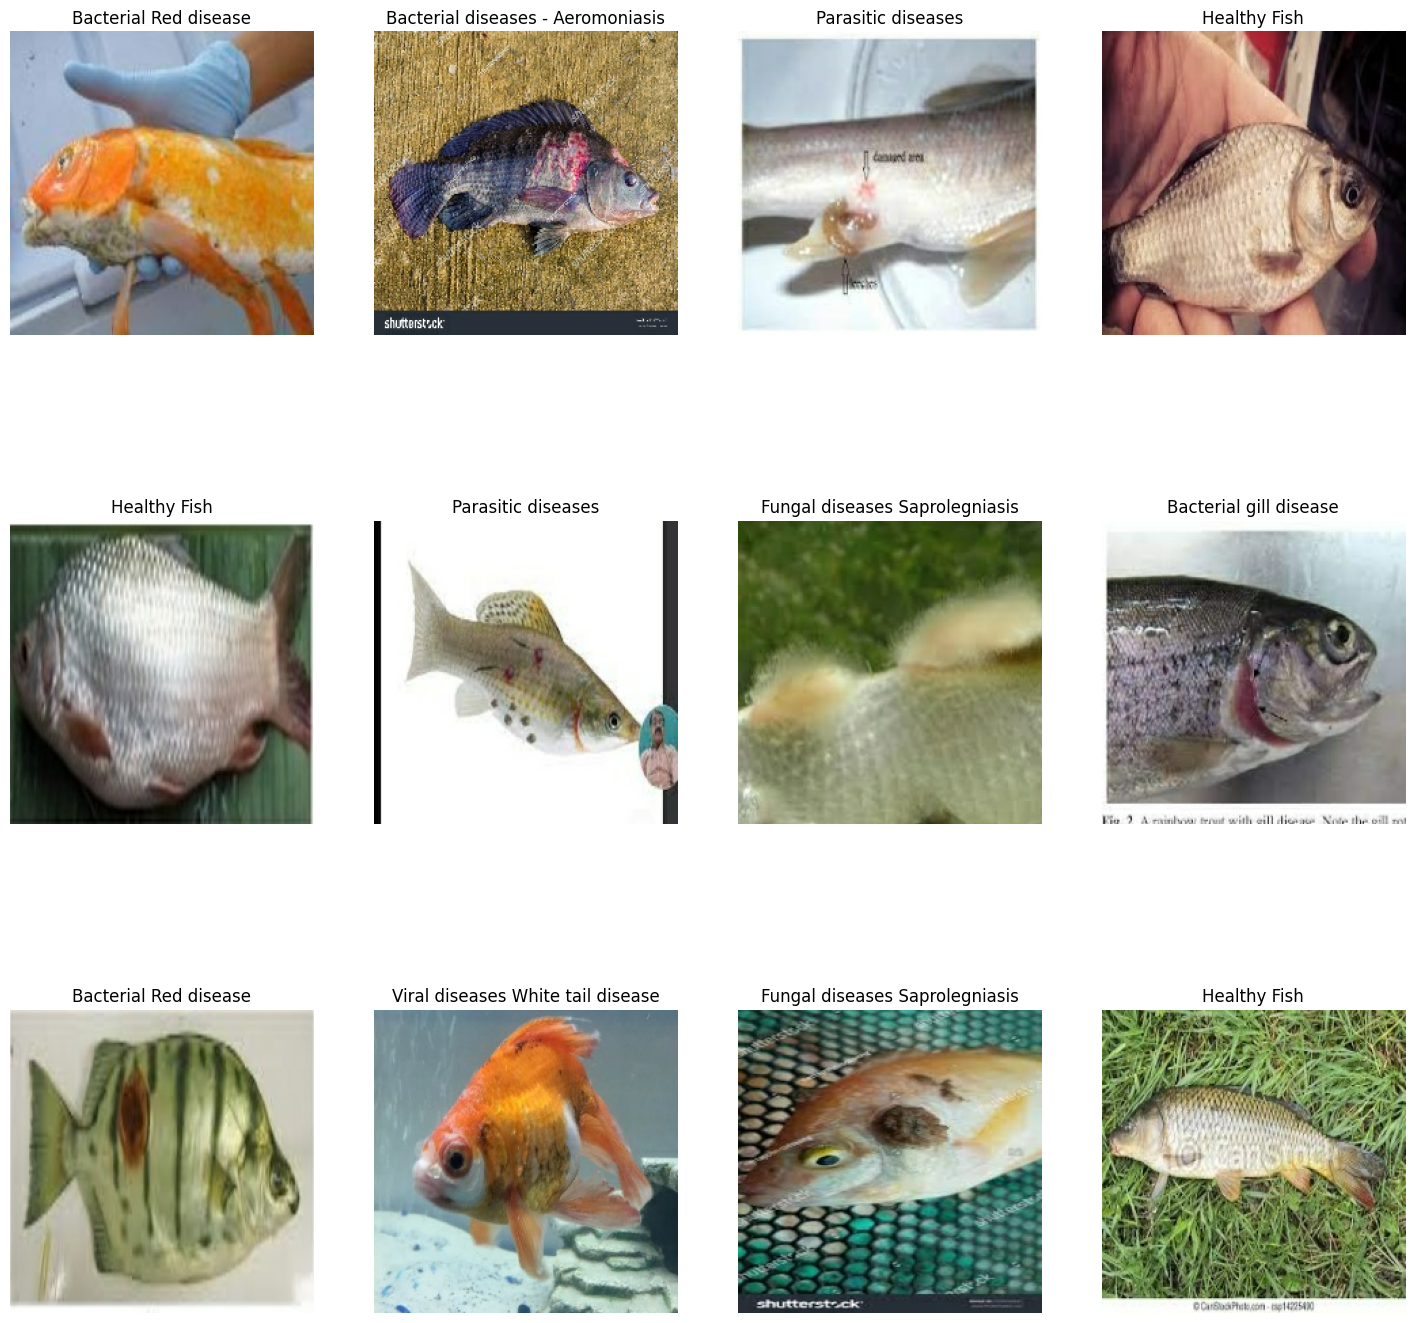

In [209]:
plt.figure(figsize=(18,18))
for image_batch, label_batch in dataset.take(1):
  print(image_batch.shape)
  print(label_batch.numpy())
  print(image_batch[0].shape)
  for i in range(12):
      ax = plt.subplot(3,4,i+1)
      plt.imshow(image_batch[i].numpy().astype("uint8"))
      plt.title(classes[label_batch[i]])
      plt.axis("off")

In [210]:
train_size=0.7
val_size=0.1
len(dataset)*train_size

10.5

In [211]:
train_ds=dataset.take(int(len(dataset)*train_size))
len(train_ds)

10

In [212]:
secondary_ds = dataset.skip(int(len(dataset)*train_size))
len(secondary_ds)

5

In [213]:
import math
val_ds=secondary_ds.take(math.ceil(len(secondary_ds)*val_size))
len(val_ds)

1

In [214]:
test_ds=secondary_ds.skip(math.ceil(len(secondary_ds)*val_size))
len(test_ds)

4

In [215]:
import tensorflow as tf
from tensorflow.keras import models, layers

CHANNELS = 3  # Assuming RGB images, change this if using grayscale images

# Define your model
input_shape = (IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
num_classes = 7

model = models.Sequential([
    layers.Rescaling(1./255, input_shape=input_shape),
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.Dense(num_classes)
])


model.build(input_shape=input_shape)

In [216]:
model.summary()

Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_13 (Rescaling)    (None, 224, 224, 3)       0         
                                                                 
 conv2d_24 (Conv2D)          (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d_24 (MaxPooli  (None, 111, 111, 32)      0         
 ng2D)                                                           
                                                                 
 conv2d_25 (Conv2D)          (None, 109, 109, 32)      9248      
                                                                 
 max_pooling2d_25 (MaxPooli  (None, 54, 54, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_26 (Conv2D)          (None, 52, 52, 64)      

In [217]:
model.compile(
    optimizer='adam',
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)

In [218]:
history = model.fit(
    train_ds,
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    verbose=1,
    validation_data=val_ds
)

Epoch 1/50
10/10 [==============================] - 4s 124ms/step - loss: 2.4061 - accuracy: 0.2313 - val_loss: 2.0318 - val_accuracy: 0.2500
Epoch 2/50
10/10 [==============================] - 1s 111ms/step - loss: 1.7187 - accuracy: 0.4062 - val_loss: 1.7351 - val_accuracy: 0.3125
Epoch 3/50
10/10 [==============================] - 1s 113ms/step - loss: 1.6008 - accuracy: 0.4125 - val_loss: 1.4316 - val_accuracy: 0.5000
Epoch 4/50
10/10 [==============================] - 1s 99ms/step - loss: 1.3501 - accuracy: 0.5562 - val_loss: 1.1477 - val_accuracy: 0.6250
Epoch 5/50
10/10 [==============================] - 1s 86ms/step - loss: 1.1865 - accuracy: 0.5844 - val_loss: 1.1712 - val_accuracy: 0.5625
Epoch 6/50
10/10 [==============================] - 1s 76ms/step - loss: 0.9193 - accuracy: 0.6844 - val_loss: 0.8435 - val_accuracy: 0.7188
Epoch 7/50
10/10 [==============================] - 1s 74ms/step - loss: 0.6360 - accuracy: 0.7906 - val_loss: 0.6440 - val_accuracy: 0.7500
Epoch 8/50

In [219]:
scores = model.evaluate(test_ds)

4/4 [==============================] - 0s 17ms/step - loss: 0.0473 - accuracy: 0.9810


In [220]:
history.params

{'verbose': 1, 'epochs': 50, 'steps': 10}

In [221]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [222]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

Text(0.5, 1.0, 'Training and Validation Loss')

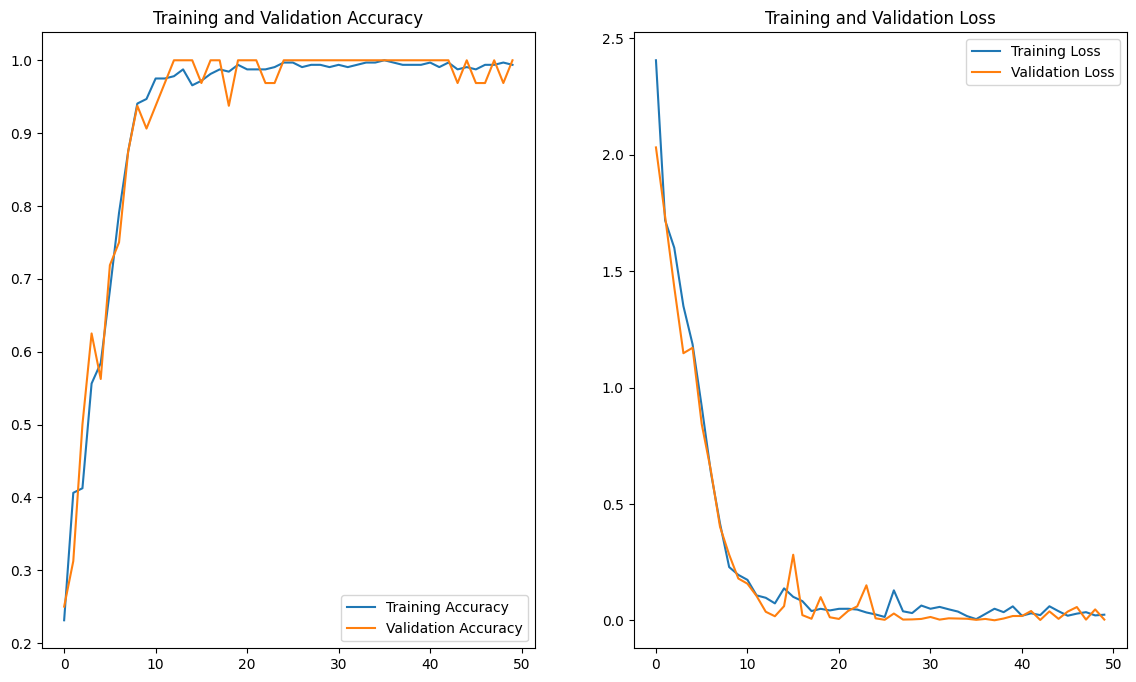

In [223]:
plt.figure(figsize=(14,8))
plt.subplot(1,2,1)
plt.plot(range(EPOCHS), acc, label='Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1,2,2)
plt.plot(range(EPOCHS), loss, label='Training Loss')
plt.plot(range(EPOCHS), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')

First image to predict
Actual label:  Bacterial Red disease
1/1 [==============================] - 0s 102ms/step
Predicted label: Bacterial Red disease


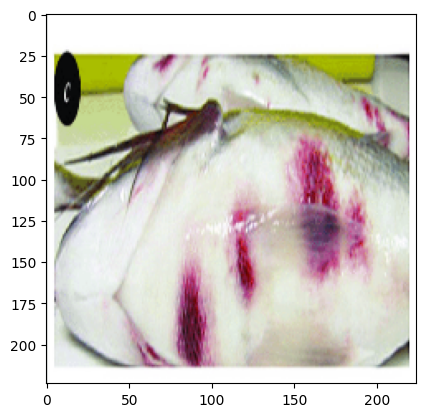

In [224]:
for image_batch, label_batch in test_ds.take(1):
  first_image = image_batch[0].numpy().astype('uint8')
  first_label = label_batch[0].numpy()

  print("First image to predict")
  plt.imshow(first_image)
  print("Actual label: ", classes[first_label])

  batch_predict = model.predict(image_batch)
  print("Predicted label:", classes[np.argmax(batch_predict[0])])

In [225]:
def predict(model, img):
  img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
  img_array = tf.expand_dims(img_array, 0)

  predictions = model.predict(img_array)

  predicted_class = classes[np.argmax(predictions[0])]
  probabilities = tf.nn.softmax(predictions)
  confidence = 100 * probabilities[0, np.argmax(predictions)]

  return predicted_class,confidence

1/1 [==============================] - 0s 25ms/step


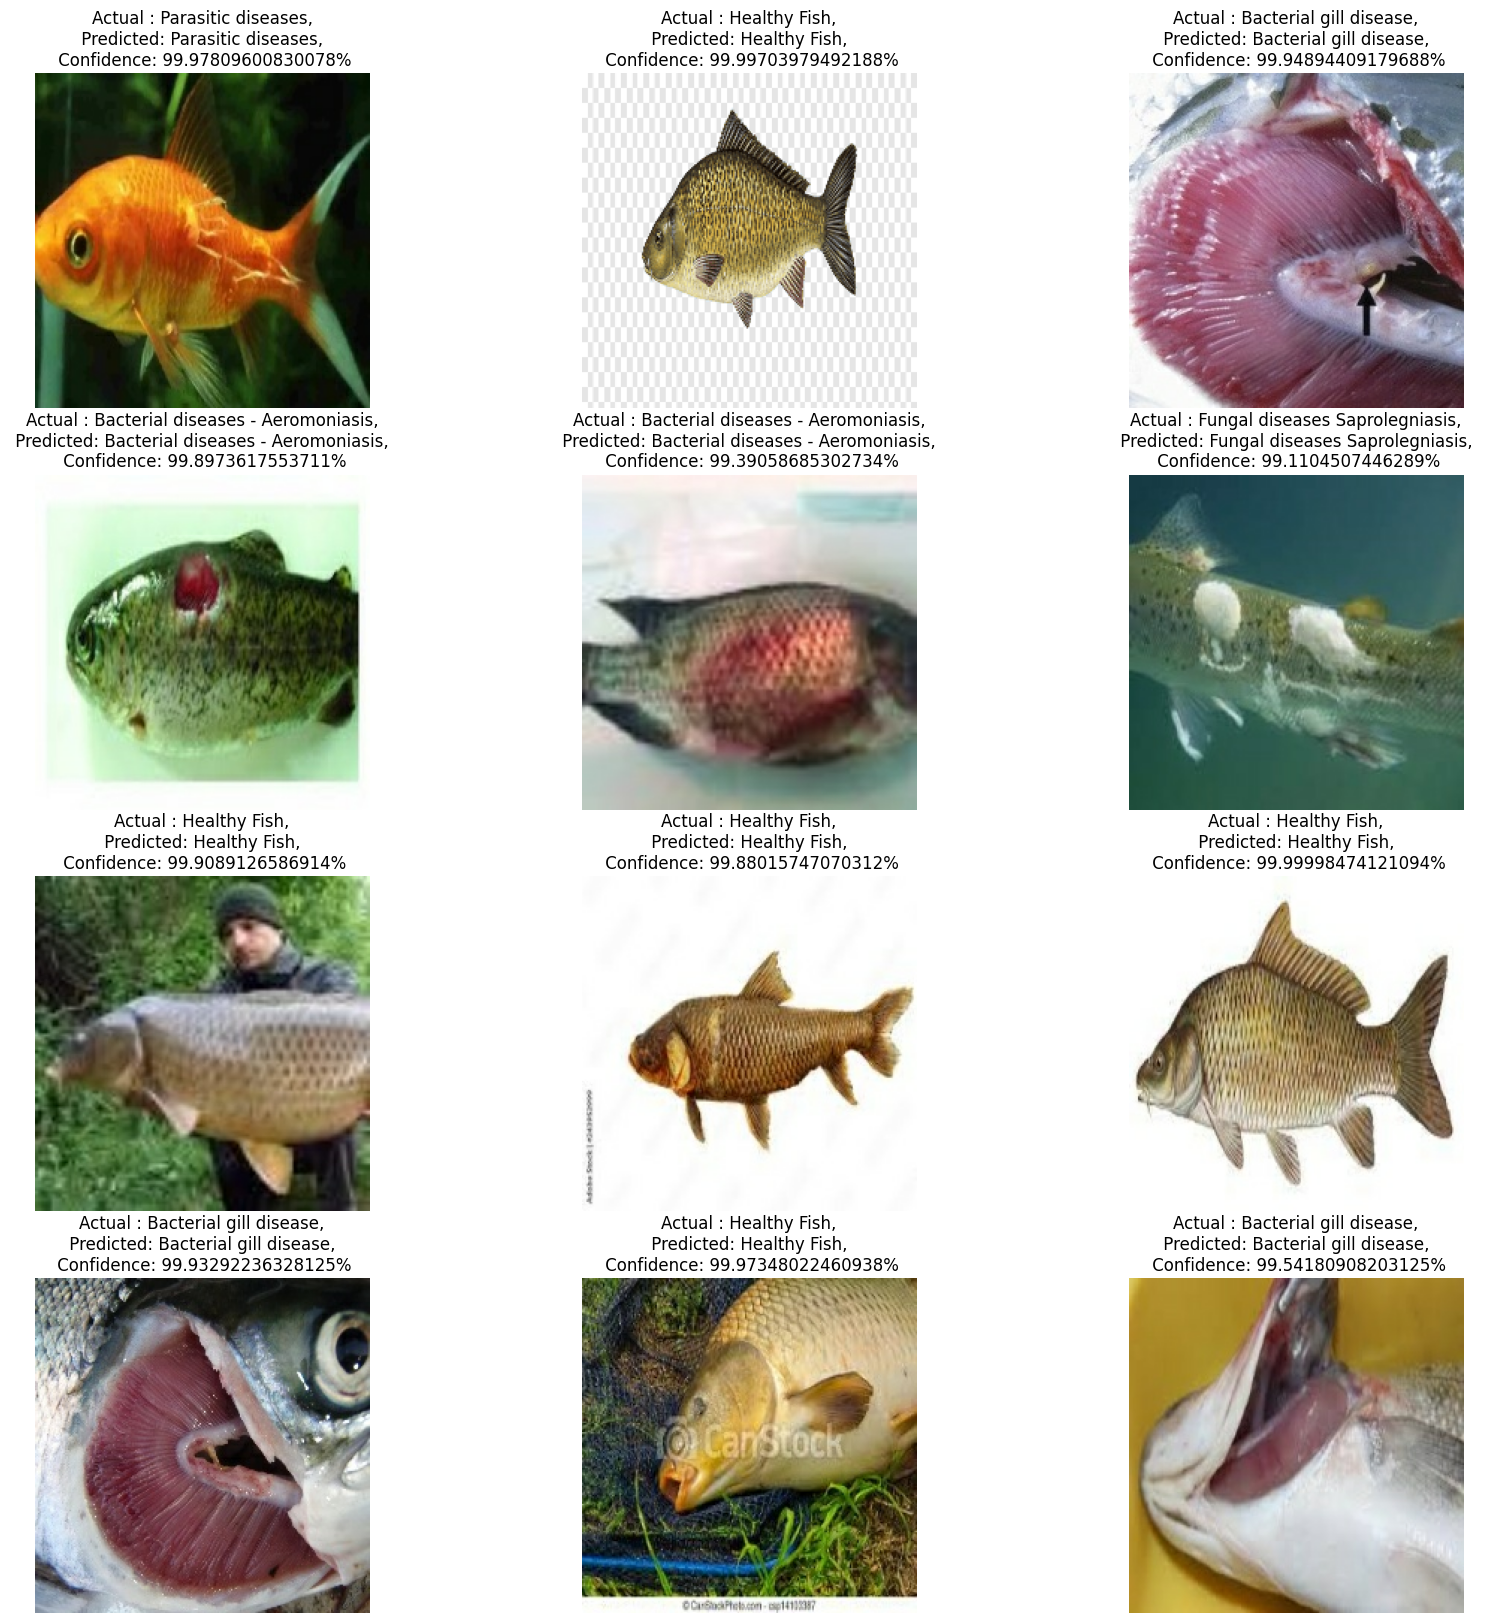

In [226]:
plt.figure(figsize=(20,20))

for images, labels in test_ds.take(1):
  for i in range(12):
    ax = plt.subplot(4,3, i+1)
    predicted_class, confidence = predict(model, images[i].numpy())
    actual_class = classes[labels[i]]

    plt.imshow(images[i].numpy().astype('uint8'))
    plt.title(f"Actual : {actual_class},\n Predicted: {predicted_class}, \n Confidence: {confidence}%")
    plt.axis("off")

In [227]:
model_version=1
model.save(f"../models/{model_version}")

In [228]:
classes

['Bacterial Red disease',
 'Bacterial diseases - Aeromoniasis',
 'Bacterial gill disease',
 'Fungal diseases Saprolegniasis',
 'Healthy Fish',
 'Parasitic diseases',
 'Viral diseases White tail disease']

In [229]:
import tensorflow as tf

# Assuming train_ds is a TensorFlow dataset object containing images and labels
# Assuming model is your trained TensorFlow model

# Extract true labels from train_ds
true_labels = []
for image, label in train_ds:
    true_labels.append(label.numpy())

# Flatten the list of true labels
true_labels = tf.concat(true_labels, axis=0)

# Make predictions on the training set using the trained model
predictions = []
for image, _ in train_ds:
    prediction = model.predict(image)
    predictions.append(prediction)

# Flatten the list of predictions
predictions = tf.concat(predictions, axis=0)

# Convert predictions to class labels (assuming the highest predicted class index represents the predicted class)
predicted_labels = tf.argmax(predictions, axis=1)

# Compute confusion matrix
cf_mx_train = tf.math.confusion_matrix(labels=true_labels, predictions=predicted_labels)

# Print or visualize the confusion matrix as needed
print(cf_mx_train)


1/1 [==============================] - 0s 51ms/step
tf.Tensor(
[[ 1  3  5  5  8  3  4]
 [ 4  3  4  1 16  2  4]
 [ 6  3  4  3 15  5  4]
 [ 5  6  1  1 14  2  2]
 [10 12 13 14 57 10 14]
 [ 5  6  4  0  6  1  3]
 [ 2  4  4  4 14  2  1]], shape=(7, 7), dtype=int32)


Text(0.5, 1.0, 'Confusion Matrix Train')

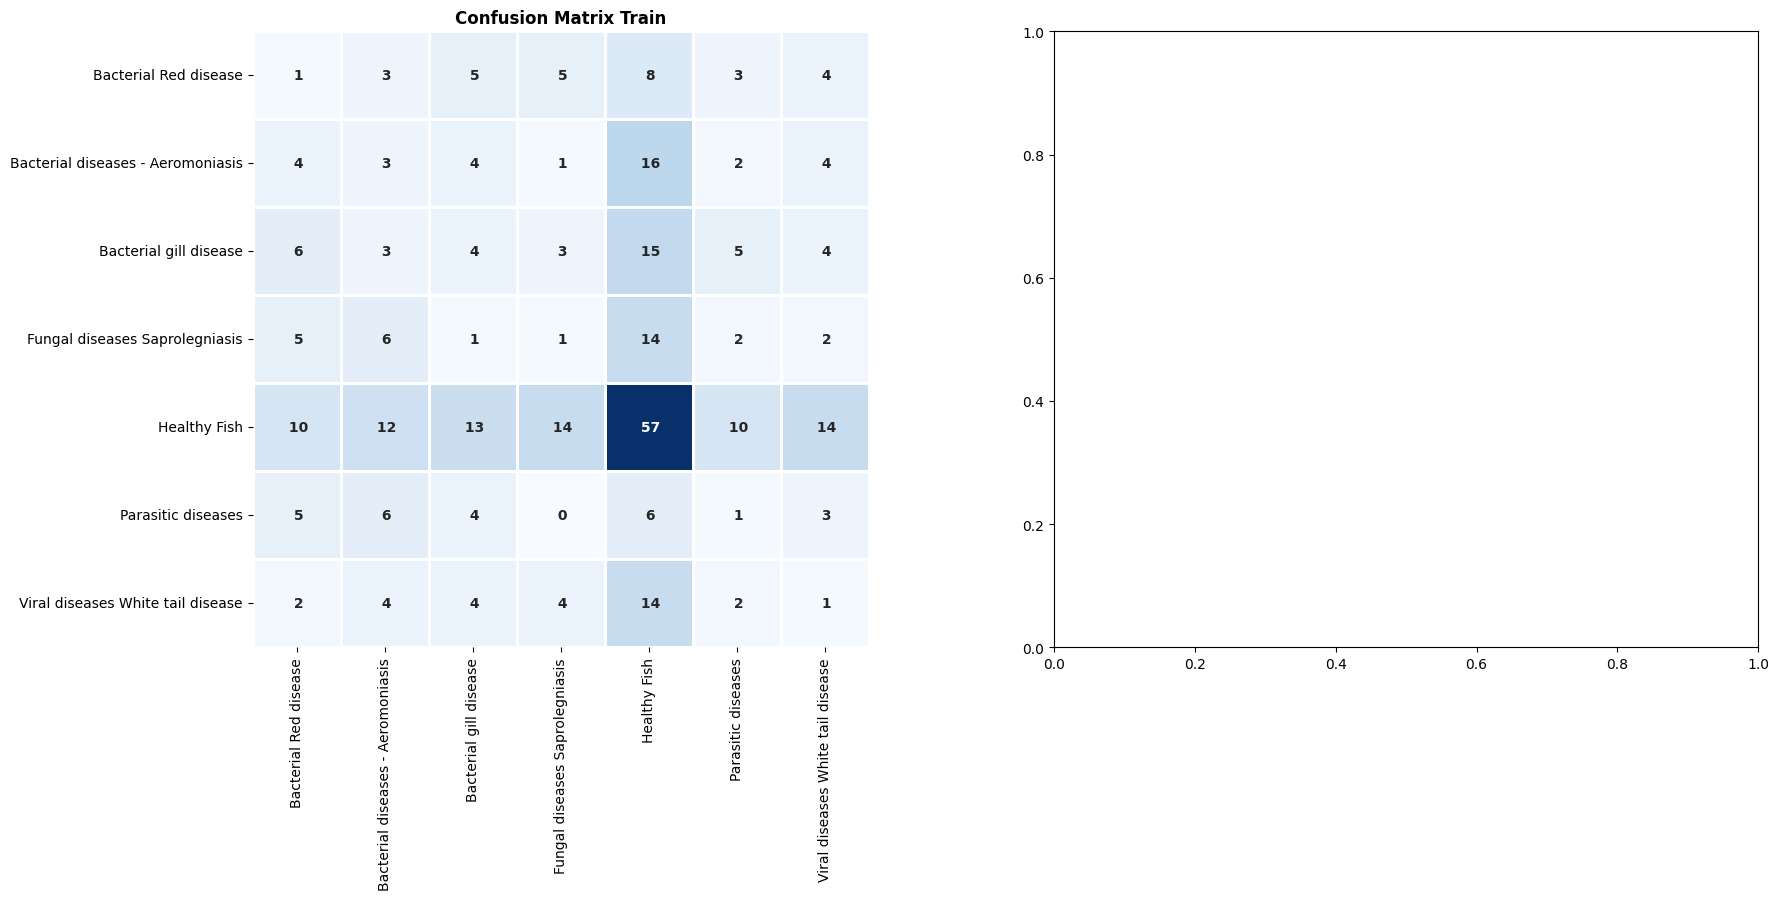

In [230]:
# Confusion Matrix Plot
fig,ax = plt.subplots(nrows = 1, ncols = 2, figsize = (20,8))
ax = ax.flat
sns.heatmap(cf_mx_train,
            cmap = 'Blues',
            annot = True,
            fmt = ' ',
            annot_kws = {"fontsize":10,
                         "fontweight":"bold"},
            linewidths = 1,
            linecolor = "white",
            cbar = False,
            square = True,
            xticklabels = classes,
            yticklabels = classes,
            ax = ax[0])
ax[0].set_title('Confusion Matrix Train', fontsize = 12, fontweight = 'bold', color = 'black')